In [ ]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
x = sp.symbols('x')

#01. Numerical methods for solving first order differential equations.

##Euler Method:

Given a differential equation of the form
$$\frac{dy}{dx} = f(x,y).$$
In addition, the initial values of $x_0$ and $y_0$. In the same manner as the Trapezoidal Rule we have to create a step size $$dx = \frac{(x_f - x_0)}{N}$$
where, $N$ is the number of steps and $x_f$ is the final value of $x$. The value of $y$ is then updated every step using the formula:
$$y_{n+1} = y_n + f(x_n, y_n)\times dx$$

###Example Model:
$$\frac{dG}{dt} = kG$$
Given that initial conditions are $t_0 = 0$, $G_0 = 100$. The solution to this first order ordinary differential equation is $$G = G(t)$$.

We will solve this for multiple values of $k$ which is a constant.


(0.4, 1.0)

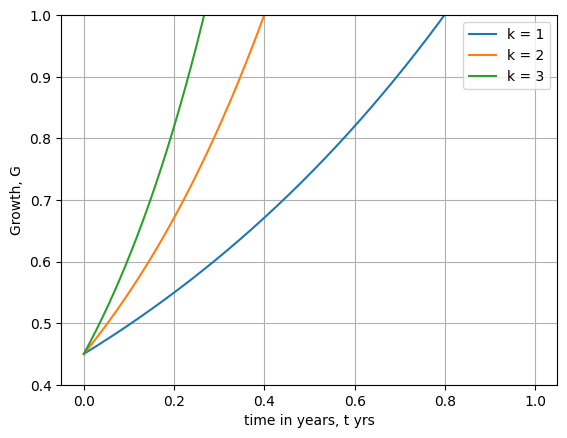

In [ ]:
t = sp.symbols('t')   #Here 't' is the variable
G = sp.Function('G')  #Here 'G' is a function of 't'

def dGdt(t, G, k):      #This is the model or our DE
  return(k*G)

def EM(t0,tf,G0,N):
  #We will first define the step size 'dx'
  dt = (tf - t0)/N

  #Now create two arrays for the values of 't' and 'G'.
  t_val = []
  G_k1 = []    #For k=1
  G_k2 = []    #For k=2
  G_k3 = []    #For k=3

  #Set starting point of each
  Gk1 = G0
  Gk2 = G0
  Gk3 = G0

  #Now run a loop that updates the values of 't' and 'G'
  for i in range(0,N):
    #Append values first
    t_val.append(t0)
    G_k1.append(Gk1)
    G_k2.append(Gk2)
    G_k3.append(Gk3)

    Gk1 += dt*dGdt(t0, Gk1, 1)
    Gk2 += dt*dGdt(t0, Gk2, 2)
    Gk3 += dt*dGdt(t0, Gk3, 3)

    t0 += dt

  return t_val, G_k1, G_k2, G_k3

t0 = 0 #initial value of 't'
tf = 1 #final value of 't'
G0 = 0.45 #initial value of 'G'
N = 1000 #No. of steps

t_v, G_k1, G_k2, G_k3 = EM(t0,tf,G0,N)

plt.plot(t_v, G_k1, label='k = 1')
plt.plot(t_v, G_k2, label='k = 2')
plt.plot(t_v, G_k3, label='k = 3')

#Setting the plot
plt.legend()
plt.grid()
plt.xlabel('time in years, t yrs')
plt.ylabel('Growth, G')
plt.ylim(0.4, 1)

##Runge-Kutta (RK4 Method):

This method is very similar to the previous algorithm (Euler Method). The Runge-Kutta method, particularly the RK4 (fourth-order) method, derives from the idea of approximating the solution of a first-order ordinary differential equation (ODE).

For a differential equation of the form

$$\frac{dy}{dx} = f(x,y)$$

We start off by following the same initial steps from the Euler Method (EM).

It works in four stages. First, calculate the slope at the initial points.
$$K_1 = dx \times f(x_n, y_n)$$
Using this slop, estimate the midpoint value
$$K_2 = dx \times f(x_n + dx/2, y_n + K1/2)$$
Now, refine the estimate at the midpoint value
$$K_3 = dx \times f(x_n + dx/2, y_n + K_2/2)$$
then, use the slop at the endpoint to get the final estimate
$$K_4 = dx \times f(x_n + dx/2, y_n + K_3/2)$$
Finally, the RK4 method combines these intermediate slopes in a weighted average to estimate the function's next value
$$y_{n+1} = y_{n} + \frac{1}{6} (K_1 + 2 K_2 + 2 K_3 + K_4)$$
Next, we end the process same way as done in EM.

###Example Model:

$$\frac{dy}{dt} + 2y = 50t$$

Now, to put this in a python code we must first convert into the following form

$$\frac{dy(t)}{dt} = 2(25t - y)$$

The solution to this equation will be a function of $t$, $y = y(t)$. Given that, the intitial values are $t_0 = 1$, $y_0 = 1.5$.

Text(0, 0.5, 'y(t)')

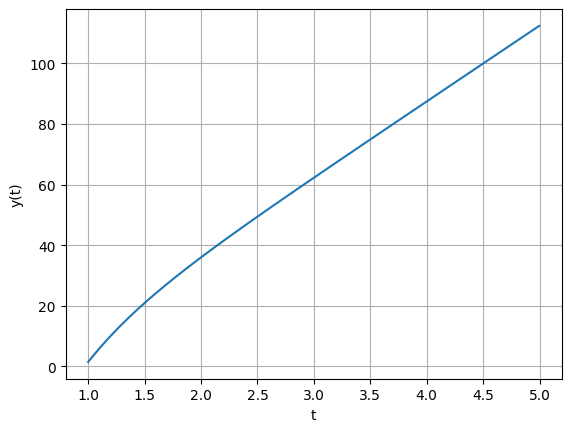

In [ ]:
def dydt(t,y):
  return(2*(25*t - y))

def RK4(t0,tf,y0,N):
  #We begin using the same method in EM
  dt = (tf-t0)/N

  t_val = []
  y_val = []

  for i in range(0,N):
    #Start by appending each value first
    t_val.append(t0)
    y_val.append(y0)

    #We now begin the stages of Runge-Kutta (RK4)
    K1 = dt*dydt(t0,y0)
    K2 = dt*dydt(t0 + dt/2, y0 + K1/2)  #Midpoint value
    K3 = dt*dydt(t0 + dt/2, y0 + K2/2)  #Refined Midpoint value
    K4 = dt*dydt(t0 + dt, y0 + K3)      #Final value of the change

    #Update next value of y0
    y0 += (1/6)*(K1 + 2*K2 + 2*K3 + K4)

    #Update next value of t0
    t0 += dt

  return t_val, y_val

t0 = 1 #initial value of 't'
tf = 5 #final value of 't'
y0 = 1.5 #initial value of 'G'
N = 1000 #No. of steps

t_v,y_v = RK4(t0,tf,y0,N)

plt.plot(t_v,y_v)

plt.grid()
plt.xlabel('t')
plt.ylabel('y(t)')

#02. Solving first order differential equations with python packages.


The model:

$$\frac{dy}{dx} = -y^2/x^2$$

Initial values:

$$x_0 = 1 \, \, \text{,} \, \, y_0 = \frac{1}{2}$$

Analytic solution derived in class:

$$y = -\frac{x}{1 - 3x}$$


##Method 1:
Using Function() and dsolve() from the package sympy.

In [ ]:
#Create an arbitrary function of x
y = sp.Function('y')

#Define the derivative
dy = sp.diff(y(x),x)

#Define the model
ODE = dy + y(x)**2/x**2

#Get general solution
solG = sp.dsolve(ODE, y(x))

display(solG)

#Get particular solution
solP = sp.dsolve(ODE, y(x), ics={y(1):1/2})  #ics={y(initial x): initial y}

display(solP)

Eq(y(x), -x/(C1*x + 1))

Eq(y(x), -x/(1 - 3.0*x))

##Method 2:

Solving numerically using odeint() from the package scipy.integrate.

Text(0, 0.5, 'y-axis')

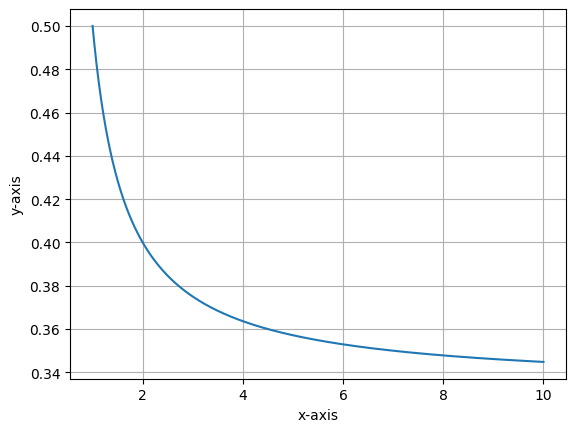

In [ ]:
#Import the correct package
from scipy.integrate import odeint

#Define the model
def dydx(y,x):  #value of y must be the first argument
  return -y**2/x**2
#Define required variables
x0 = 1
xf = 10
y0 = 1/2
N = 1000

#Create the domain
x_v = np.linspace(x0,xf,N)

#Get values of y
y_v = odeint(dydx, y0, x_v)

plt.plot(x_v,y_v)

plt.grid()
plt.xlabel('x-axis')
plt.ylabel('y-axis')

#03. Practice problem

Find the solutions to the differential equation with initial values $t_0 = 0$, $y_0 = -3/4$
$$\sec(t) \frac{dy}{dt} - e^{y + \sin(t)} = 0$$
using the all the methods shown above and compare the results.